##### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:Green;"> Outlier Detection and Handling

#### <span style="font-family: Arial;font-size:1em;color:green;">  Import the libraries :

In [99]:
#Enable graph plotting in Jupyter
%matplotlib inline

# Numerical libraries
import numpy as np  

# to handle data in form of rows and columns 
import pandas as pd    

import matplotlib.pyplot as plt   
import matplotlib.style

#### <span style="font-family: Arial;font-size:1em;color:green;">  Enter the filename along with extension (Accepted format: csv/xls/xls) 
##### Example: Cancer.csv

In [60]:
filename = input('Enter the filename (with extension): ')

Enter the filename (with extension): Cancer_data.csv


#### <span style="font-family: Arial;font-size:1em;color:green;"> Reading the file ..

In [100]:
data=pd.DataFrame()
def rData(fname):
    if fname.find('csv') != -1:
        return pd.read_csv(fname,engine='python',sep=',') #Assuming the delimiter is ",".For anything else, please change here
    elif fname.find('data') != -1:
        return pd.read_csv(fname,engine='python',sep=',') #Assuming the delimiter is ",".For anything else, please change here
    elif fname.find('xlsx') != -1:
        return pd.read_excel(fname)
    elif fname.find('xls') != -1:
        return pd.read_excel(fname)
    else:
        print("Either we haven't mentioned the extension or format is not accepted !")
        return data

data= rData(filename)

#### <span style="font-family: Arial;font-size:1em;color:green;"> Displaying the first 10 records..

In [101]:
data.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.1471,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.2654,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.1279,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2654,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.1052,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2654,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.1043,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.2654,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.2654,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.074,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.2654,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.2654,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2654,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2654,0.4366,0.20750


### <span style="font-family: Arial;font-size:1em;color:green;"> Outlier detection - Graphical

In [102]:
def out_detect_graphical(data):
    col_list=data.columns.tolist()
    for col in data.columns[data.dtypes == 'object']:  
        col_list.remove(col)


    fig, axes = plt.subplots(int(len(col_list)/2),5, figsize=((len(col_list)/2)+15,(len(col_list)/2)+20))#Adjust the dimension here
    axes = axes.flatten()

    i = 0
    for t in col_list:
        ax = sns.boxplot( y=t, data=data, orient='h', width=0.2,  ax=axes[i],color='green')
        fig=plt.gcf()
        i +=1
    
    for k in range(1,((int((len(col_list)/2))*5)+1)-int(len(col_list))):
        axes.flat[-1*k].set_visible(False)
        

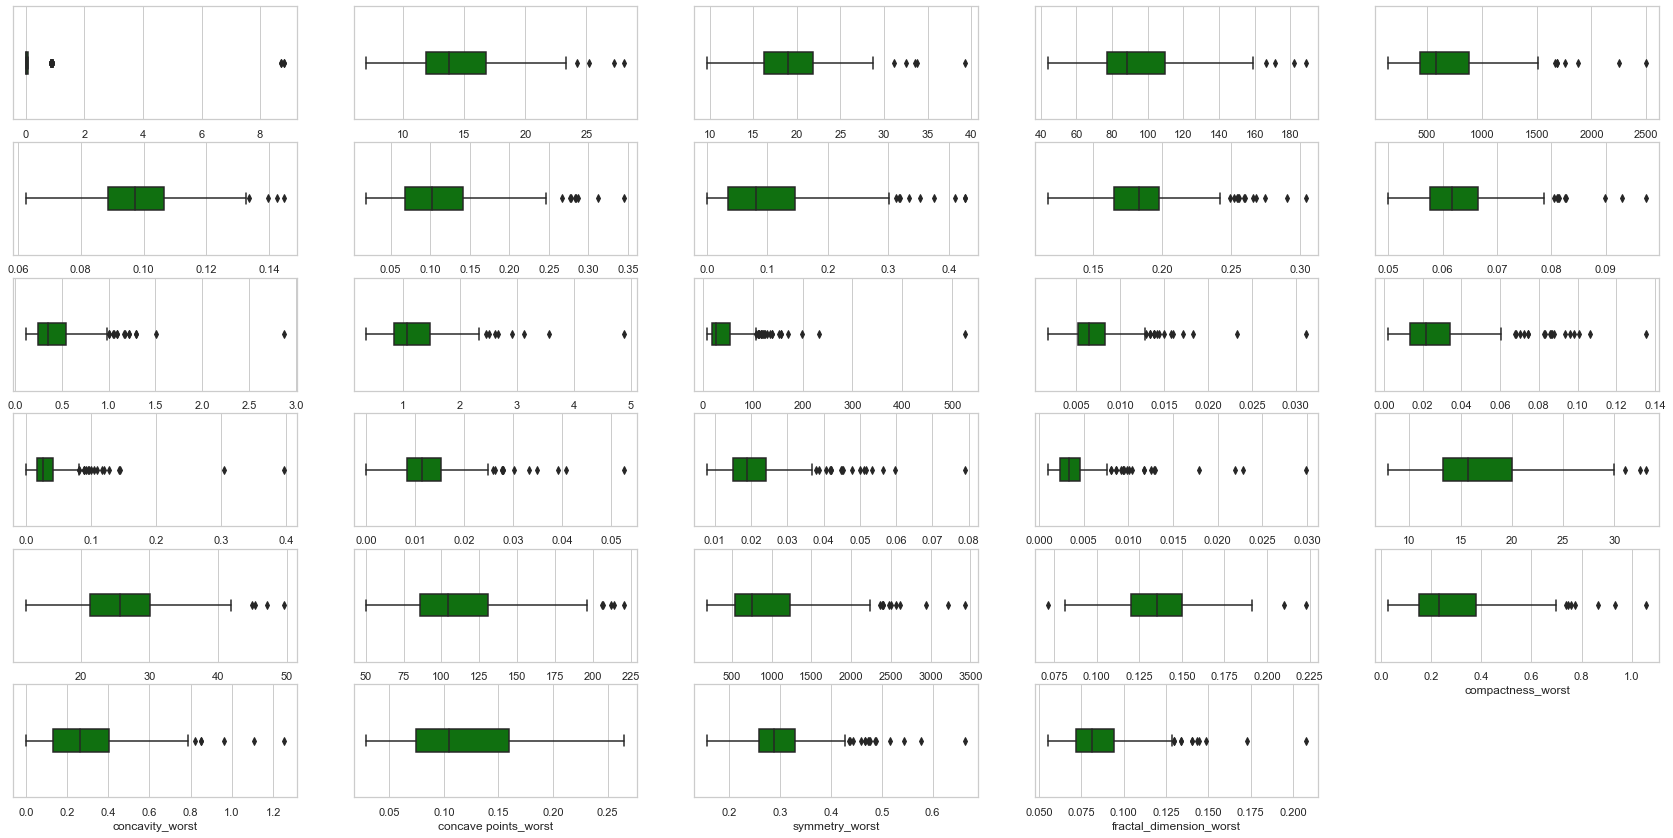

In [103]:
out_detect_graphical(data)

### <span style="font-family: Arial;font-size:1em;color:green;"> Outlier detection - Tabular

In [104]:
Q1 = data.quantile(0.25,numeric_only=True)
Q3 = data.quantile(0.75,numeric_only=True)
IQR = Q3 - Q1

col_list=data.columns.tolist()
for col in col_list:
    data_q1=(data < (Q1 - 1.5 * IQR)).sum()
    data_q3=(data > (Q3 + 1.5 * IQR)).sum()
    data_Q1=Q1
    data_Q3=Q3

data_q1_quantile_df=pd.DataFrame({'columns':data_Q1.index, 'q1':data_Q1.values})
data_q3_quantile_df=pd.DataFrame({'columns':data_Q3.index, 'q3':data_Q3.values})
data_q1_df=pd.DataFrame({'columns':data_q1.index, 'outlier_q1':data_q1.values})
data_q3_df=pd.DataFrame({'columns':data_q3.index, 'outlier_q3':data_q3.values})
data_out_df=data_q1_df.merge(data_q3_df,on='columns').merge(data_q1_quantile_df,on='columns').merge(data_q3_quantile_df,on='columns')
data_out_df

,columns,outlier_q1,outlier_q3,q1,q3
0,area_mean,0,7,434.200000,8.832500e+02
1,area_se,0,22,18.850000,5.378000e+01
2,area_worst,0,11,543.650000,1.231000e+03
3,compactness_mean,0,8,0.068590,1.420500e-01
4,compactness_se,0,18,0.013785,3.426000e-02
5,compactness_worst,0,7,0.151450,3.789500e-01
6,concave points_se,0,12,0.008390,1.532500e-02
7,concave points_worst,0,0,0.074070,1.599000e-01
8,concavity_mean,0,9,0.035075,1.461000e-01
9,concavity_se,0,18,0.016520,4.242000e-02


### <span style="font-family: Arial;font-size:1em;color:green;"> Outlier Handling - Replace with Quantiles

In [105]:
data_quantile_method=data
for col in data_out_df['columns'].values:
    data_quantile_method[col]=np.where(data_quantile_method[col]>data_quantile_method[col].quantile(0.75),data_quantile_method[col].quantile(0.75),data_quantile_method[col])
    data_quantile_method[col]=np.where(data_quantile_method[col]<data_quantile_method[col].quantile(0.25),data_quantile_method[col].quantile(0.25),data_quantile_method[col])

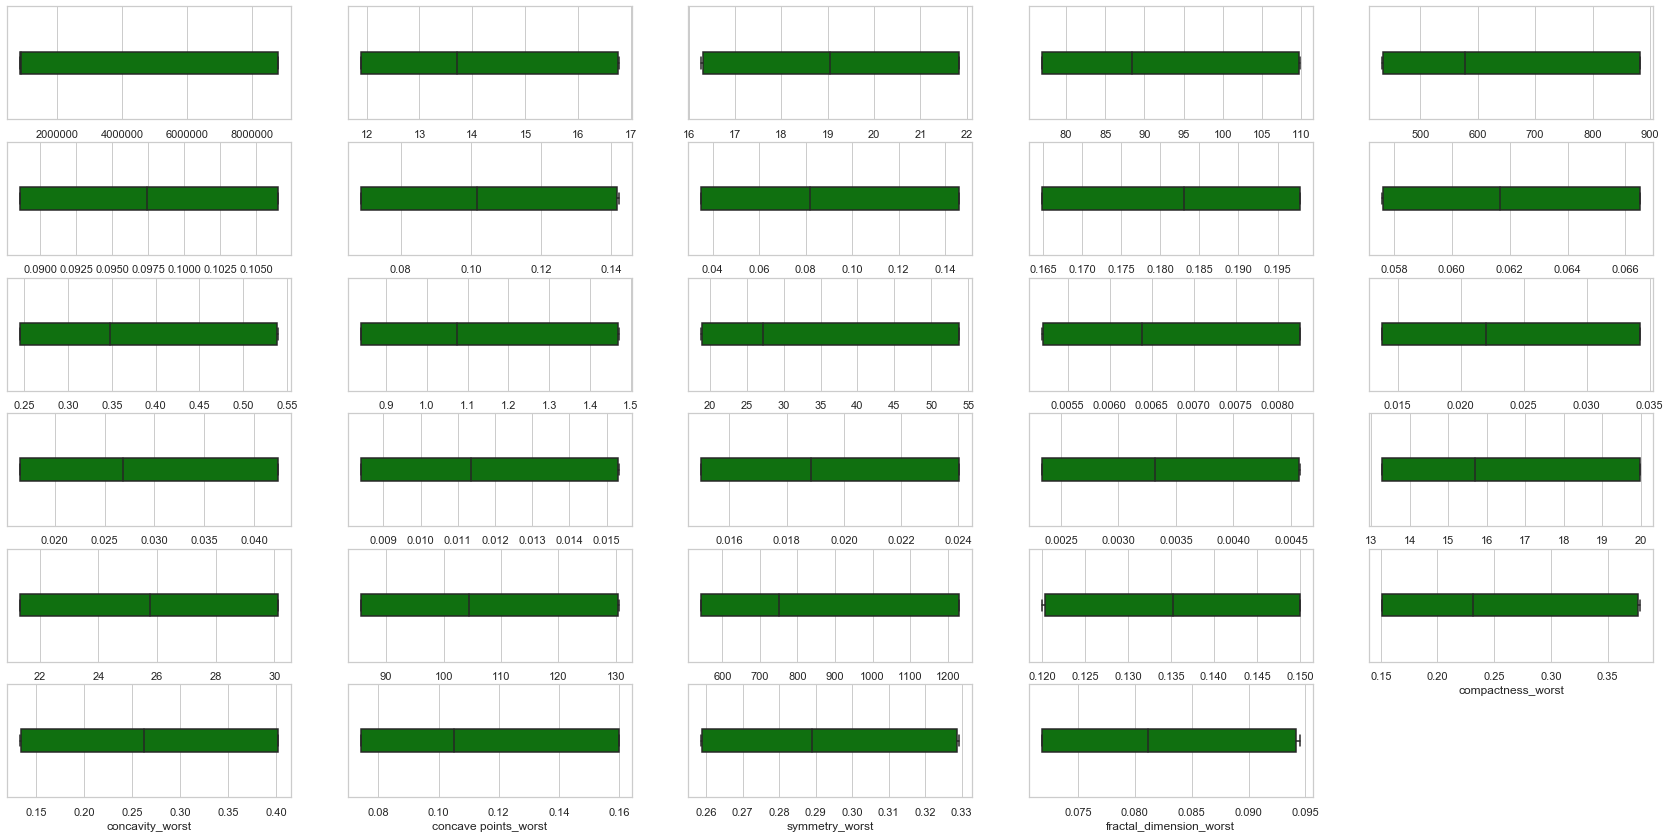

In [106]:
out_detect_graphical(data_quantile_method)